# Proof

Given $\displaystyle y(x,w)=\sum_{j=0}^M{w_jx^j}$ and $\displaystyle E(w)=\dfrac12\sum_{n=1}^N{[y(x_n,w)-t_n]^2}$.

Now, if we want to minimize $E(w)$ w.r.t. $w$, we have $\dfrac{\partial E(w)}{\partial w}=0$, and hence $\forall i\in\{0,1,\dots,M\},\dfrac{\partial E}{\partial w_i}=0$

$\displaystyle\Rightarrow\dfrac{\partial E}{\partial w_i}=\sum_{n=1}^N{[y(x_n,w)-t_n]x_n^i}=0$

$\displaystyle\Rightarrow\sum_{n=1}^N{x_n^i y(x_n,w)}=\sum_{n=1}^N{x_n^i t_n}$

(Note that here the right side of the equations is exactly $T_i$)

$\displaystyle\Rightarrow\sum_{n=1}^N{x_n^i y(x_n,w)}
=\sum_{n=1}^N{x_n^i\sum_{j=0}^M{w_jx_n^j}}
=\sum_{n=1}^N{\sum_{j=0}^M{w_jx_n^{i+j}}}
=\sum_{j=0}^M{\sum_{n=1}^N{x_n^{i+j}w_j}}
=\sum_{j=0}^M{A_{ij}w_j}$.

# Experimentation

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Generate $x$ and $t$ with $N=10$.

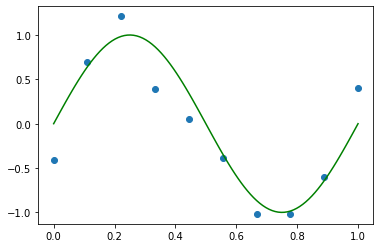

In [2]:
N = 10
x = np.linspace(0, 1, N)
t = np.sin(2 * np.pi * x) + np.random.normal(0, .2, N)  # sin(2𝛑x) + noise

plt.scatter(x, t)
test = np.linspace(0, 1, 100)
plt.plot(test, np.sin(2 * np.pi * test), 'g')

Solve $Aw=T$ and see how well $y(x,w)$ is fitting the curve.

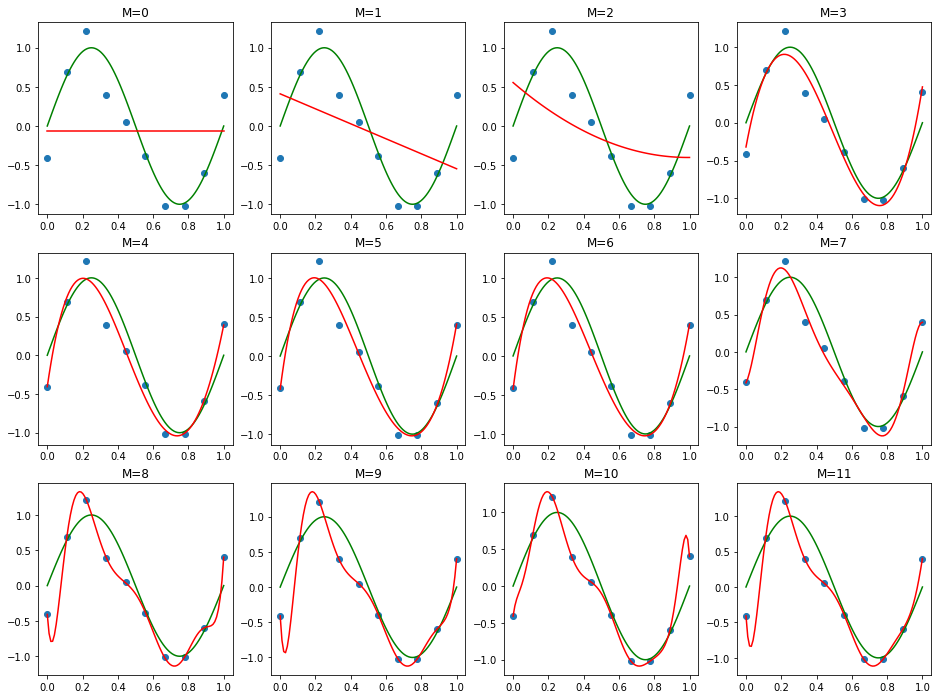

In [3]:
def display(M, plt):
    M += 1
    
    f = lambda i, j: np.sum(x ** (i + j))
    A = np.fromfunction(np.vectorize(f), (M, M))

    g = lambda i: np.sum((x ** i) * t)
    T = np.fromfunction(np.vectorize(g), (M,))

    w = np.linalg.solve(A, T)

    plt.scatter(x, t)
    plt.plot(test, np.sin(2 * np.pi * test), 'g')
    plt.plot(test, np.array([test ** j for j in range(0, M)]).T @ w, 'r')
    plt.set_title(f"M={M-1}")


_, plots = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
for i, row in enumerate(plots):
    for j, plot in enumerate(row):
        display(i * 4 + j, plot)

Set $N=50$ and see how larger dataset prevents overfitting

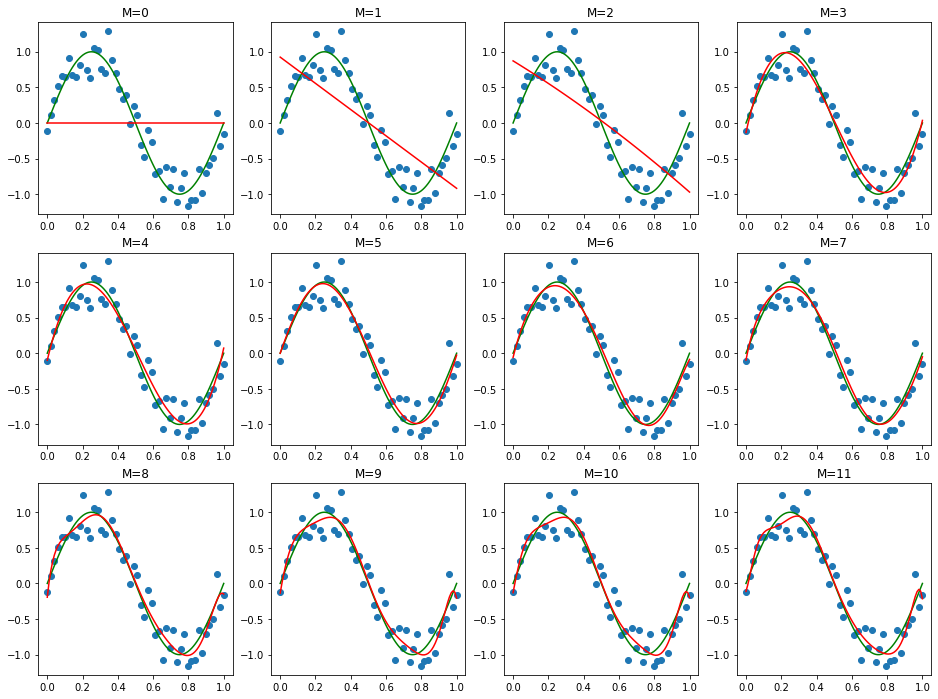

In [4]:
N = 50
x = np.linspace(0, 1, N)
t = np.sin(2 * np.pi * x) + np.random.normal(0, .2, N)

_, plots = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
for i, row in enumerate(plots):
    for j, plot in enumerate(row):
        display(i * 4 + j, plot)